In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline


In [2]:
DATA_DIR = "../data/original/"

In [20]:
# data load
articles_df=pd.read_pickle(f'{DATA_DIR}articles.pkl')
customers_df=pd.read_pickle(f'{DATA_DIR}customers.pkl')
sample_submission_df=pd.read_pickle(f'{DATA_DIR}sample_submission.pkl')
transactions_train_df=pd.read_pickle(f'{DATA_DIR}transactions_train.pkl')
color_train_df=pd.read_pickle(f'{DATA_DIR}color_kusunoki.pkl')

In [93]:
# データを少なくする(訓練データと検証データに分割する)
articles_df_sample,_=train_test_split(articles_df,test_size=0.9,random_state=0)
customer_df_sample,_=train_test_split(customers_df,test_size=0.9,random_state=0)
transactions_train_df_sample,_=train_test_split(transactions_train_df,test_size=0.9,random_state=0)

In [5]:
transactions_train_df_sample

,t_dat,customer_id,article_id,price,sales_channel_id
7980209,2019-03-29,3709c3495053312c59a4639915602b1ec20679efefda00...,590928019,0.030492,2
6782547,2019-02-27,ec756c0a1adc4b5d30ad9d2583386175e68960192fbc62...,713993013,0.013542,1
30257992,2020-08-12,7d612e568da158d754d57a849bbe058a22991ca0db029b...,704758017,0.006763,2
12377004,2019-06-22,948706bb82254f6d4bd736ff1e3bb61cd0bc08759ac365...,567729004,0.011847,2
10293876,2019-05-16,1d910cef4deea19ecb5f2b7846b0c7ef37905e01bfa2c1...,771733003,0.013542,2
...,...,...,...,...,...
5157699,2019-01-19,1910097f4a8ed0bdb46f9492a9f7a55fa55ddbcfde8a97...,408571001,0.013542,1
2215104,2018-11-07,43a88ae256219d28b8addda23bdd10d8b775ca328d6d99...,629669001,0.024763,2
18261621,2019-10-25,1271dce2db793f18bac995bf5abfe26a5179a9b74dcd9d...,777070003,0.042356,1
29665839,2020-07-30,11cd27eece32f68d472d3fb9f4953cedc51ca832fb0a10...,677999012,0.015237,2


In [6]:
# articles_dfにtrainsactions_trainのpriceを追加する
temp_df = transactions_train_df_sample[["article_id","price"]]
aricles_df_merged =pd.merge(articles_df_sample,temp_df)
#　一部重複データを最頻値でまとめる（（勾配タイミングで値段が変わっているので）
# https://scrapbox.io/ml-akihito/groupby%E3%81%AE%E4%BB%95%E6%A7%98
aricles_df_merged = aricles_df_merged.groupby("article_id").agg(lambda x: x.mode()).reset_index()

In [7]:
aricles_df_merged['colour_group_name'].value_counts()

Black              1960
Dark Blue           930
White               805
Light Pink          461
Grey                361
Light Beige         301
Blue                278
Dark Grey           250
Light Blue          249
Red                 246
Greenish Khaki      234
Off White           231
Beige               224
Dark Red            206
Dark Green          168
Pink                156
Light Grey          155
Yellow              131
Gold                130
Light Orange        124
Yellowish Brown     123
Light Yellow         91
Dark Orange          81
Dark Beige           79
Dark Pink            73
Light Turquoise      72
Orange               70
Green                67
Light Green          49
Silver               39
Turquoise            39
Other Pink           38
Light Purple         37
Dark Yellow          37
Dark Turquoise       36
Dark Purple          31
Other Yellow         22
Light Red            20
Greyish Beige        18
Other Orange         13
Purple                9
Other           

In [8]:
transactions_train_df_sample['price'].sum()

88502.26881355915

<AxesSubplot:ylabel='Frequency'>

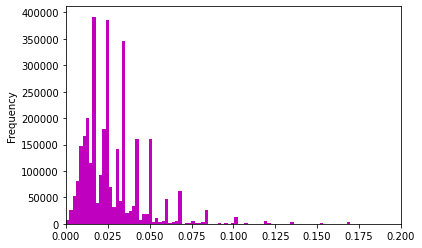

In [92]:
# plot graph

transactions_train_df_sample["price"].plot(kind='hist',xlim=(0,0.2),bins=300,color= 'm')

In [10]:
aricles_df_merged.groupby('colour_group_name').mean()['article_id']

colour_group_name
Beige              7.412276e+08
Black              7.123332e+08
Blue               6.858820e+08
Bronze/Copper      7.202687e+08
Dark Beige         7.481756e+08
Dark Blue          6.692706e+08
Dark Green         7.040045e+08
Dark Grey          6.774575e+08
Dark Orange        7.362763e+08
Dark Pink          7.129940e+08
Dark Purple        6.573539e+08
Dark Red           6.807677e+08
Dark Turquoise     6.806919e+08
Dark Yellow        7.300055e+08
Gold               7.710947e+08
Green              6.685066e+08
Greenish Khaki     7.118072e+08
Grey               6.748572e+08
Greyish Beige      7.589233e+08
Light Beige        7.469329e+08
Light Blue         6.967628e+08
Light Green        6.891064e+08
Light Grey         6.704651e+08
Light Orange       6.887181e+08
Light Pink         6.887494e+08
Light Purple       7.962620e+08
Light Red          7.175316e+08
Light Turquoise    6.873186e+08
Light Yellow       7.355725e+08
Off White          7.297115e+08
Orange             7.2

In [11]:
#Other PinkをTrueにして抜き出す
aricles_df_merged[aricles_df_merged["colour_group_name"] == "Other"].head(10)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,price
144,373506027,373506,Trainer 3p sock,302,Socks,Socks & Tights,1010010,Melange,1,Other,...,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit liner socks designed to be hidden in...,0.013542
1126,567968003,567968,Morgan sweater,252,Sweater,Garment Upper body,1010008,Front print,1,Other,...,I,Children Sizes 134-170,4,Baby/Children,77,Young Girl,1005,Jersey Fancy,Top in printed sweatshirt fabric with ribbing ...,0.006763
1416,583539001,583539,ULLA dress,265,Dress,Garment Full body,1010016,Solid,1,Other,...,H,Children Sizes 92-140,4,Baby/Children,76,Kids Girl,1014,Dresses/Skirts girls,"Mesh dress with a glitter print, wide shoulder...",0.030492
2778,651514001,651514,Halloween h-clip skeleton hand,74,Hair/alice band,Accessories,1010016,Solid,1,Other,...,J,"Children Accessories, Swimwear",4,Baby/Children,43,"Kids Accessories, Swimwear & D",1019,Accessories,Metal hair clips decorated with a skeleton han...,0.005068
3093,663851002,663851,Connor shirt,259,Shirt,Garment Upper body,1010004,Check,1,Other,...,H,Children Sizes 92-140,4,Baby/Children,46,Kids Boy,1011,Shirts,Shirt in a patterned cotton weave with a butto...,0.025407
3252,672092001,672092,Cardamom top with bow,306,Bra,Underwear,1010016,Solid,1,Other,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Push-up bra top in lace with underwired, mould...",0.025407
3423,679203001,679203,A Parisien in New York,265,Dress,Garment Full body,1010016,Solid,1,Other,...,A,Ladieswear,1,Ladieswear,14,Womens Premium,1013,Dresses Ladies,"Long satin dress with a V-neck, sewn-in wrapov...",0.083034
4076,699554001,699554,Joy cardigan,245,Cardigan,Garment Upper body,1010016,Solid,1,Other,...,A,Ladieswear,1,Ladieswear,18,Womens Trend,1003,Knitwear,"Wide, V-neck cardigan in a soft mohair blend w...","[0.0677796610169491, 0.1186271186440677]"


In [12]:
aricles_df_merged.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc', 'price'],
      dtype='object')

In [13]:
color=list(aricles_df_merged['perceived_colour_master_name'].value_counts().index)
color

['Black',
 'Blue',
 'White',
 'Grey',
 'Pink',
 'Red',
 'Beige',
 'Green',
 'Khaki green',
 'Yellow',
 'Orange',
 'Brown',
 'Metal',
 'Turquoise',
 'Mole',
 'Lilac Purple',
 'Unknown',
 'undefined']

In [14]:
# 色をRGB変換する
color=list(aricles_df_merged['colour_group_name'].value_counts().index)
for c in  color:
    if c!='Unknown' and c!="Transparent":
        print(c,webcolors.html5_parse_legacy_color(c).red,webcolors.html5_parse_legacy_color(c).blue,webcolors.html5_parse_legacy_color(c).green)
    else:
        print(c)

NameError: name 'webcolors' is not defined

In [ ]:
import matplotlib
matplotlib.colors.cnames
import webcolors

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

In [ ]:
# 色をRGB変換する
color=list(aricles_df_merged['colour_group_name'].value_counts().index)
for c in  color:
    try:
        print(webcolors.html5_parse_legacy_color(c))
    except ValueError:
        pass

HTML5SimpleColor(red=0, green=0, blue=0)
HTML5SimpleColor(red=218, green=0, blue=0)
HTML5SimpleColor(red=255, green=255, blue=255)
HTML5SimpleColor(red=0, green=0, blue=0)
HTML5SimpleColor(red=128, green=128, blue=128)
HTML5SimpleColor(red=0, green=190, blue=224)
HTML5SimpleColor(red=0, green=0, blue=255)
HTML5SimpleColor(red=218, green=0, blue=14)
HTML5SimpleColor(red=0, green=11, blue=224)
HTML5SimpleColor(red=255, green=0, blue=0)
HTML5SimpleColor(red=14, green=0, blue=160)
HTML5SimpleColor(red=255, green=0, blue=14)
HTML5SimpleColor(red=245, green=245, blue=220)
HTML5SimpleColor(red=218, green=0, blue=237)
HTML5SimpleColor(red=218, green=0, blue=224)
HTML5SimpleColor(red=255, green=192, blue=203)
HTML5SimpleColor(red=0, green=0, blue=224)
HTML5SimpleColor(red=255, green=255, blue=0)
HTML5SimpleColor(red=255, green=215, blue=0)
HTML5SimpleColor(red=0, green=0, blue=160)
HTML5SimpleColor(red=14, green=0, blue=176)
HTML5SimpleColor(red=0, green=14, blue=0)
HTML5SimpleColor(red=218, gr

In [ ]:
# 名前をRGB変換する
import webcolors
def convert_color_name_to_rgb(color_name: str):
    color_name = color_name.lower().replace(" ","")
    try:
        return webcolors.html5_parse_legacy_color(color_name).red, webcolors.html5_parse_legacy_color(color_name).green, webcolors.html5_parse_legacy_color(color_name).blue, False

    except ValueError:
        return 125,125,125, True




In [ ]:
# RGB変換して赤色と青色と緑色のカラムを作成、もとを削除
def add_feature_rgb(df):
    df[['colour_group_name-red','colour_group_name-green','colour_group_name-blue','colour_group_name-ValueError']] = df.apply(lambda x: convert_color_name_to_rgb(x["colour_group_name"]),axis=1 ,result_type='expand')
    df = df.drop('colour_group_name', axis=1)

    # ValueErrorは削除する
    df = df[df["colour_group_name-ValueError"] == False]
    df = df.drop("colour_group_name-ValueError", axis=1)
    return df

In [ ]:
new_df = add_feature_rgb(aricles_df_merged)

black 0 0 0 False
white 255 255 255 False
black 0 0 0 False
lightorange 0 10 224 False
black 0 0 0 False
white 255 255 255 False
greenishkhaki 0 0 160 False
darkblue 0 0 139 False
darkgrey 169 169 169 False
darkblue 0 0 139 False
lightpink 255 182 193 False
yellowishbrown 224 0 0 False
darkgrey 169 169 169 False
yellow 255 255 0 False
black 0 0 0 False
black 0 0 0 False
darkgrey 169 169 169 False
darkred 139 0 0 False
lightbeige 0 190 224 False
lightgrey 211 211 211 False
darkblue 0 0 139 False
darkbeige 218 11 0 False
black 0 0 0 False
lightbeige 0 190 224 False
yellowishbrown 224 0 0 False
lightgrey 211 211 211 False
darkblue 0 0 139 False
otherorange 14 10 224 False
grey 128 128 128 False
yellowishbrown 224 0 0 False
black 0 0 0 False
darkblue 0 0 139 False
lightpink 255 182 193 False
darkorange 255 140 0 False
lightpink 255 182 193 False
darkblue 0 0 139 False
grey 128 128 128 False
blue 0 0 255 False
black 0 0 0 False
grey 128 128 128 False
black 0 0 0 False
lightpink 255 182 193 

In [ ]:
new_df.head(10)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,perceived_colour_value_id,...,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,price,colour_group_name-red,colour_group_name-blue,colour_group_name-green
0,111609001,111609,200 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,4,...,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Opaque matt tights. 200 denier.,0.013542,0,0,0
1,114428026,114428,Alice BANDEAU 2-p,306,Bra,Underwear,1010017,Stripe,10,3,...,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",Two soft bandeau bras in soft jersey with side...,0.016932,255,255,0
2,118458038,118458,Jerry jogger bottoms,272,Trousers,Garment Lower body,1010010,Melange,9,4,...,Menswear,26,Men Underwear,1002,Jersey Basic,Trousers in sweatshirt fabric with an elastica...,0.033881,0,0,0
3,126589010,126589,2p Claw,72,Hair clip,Accessories,1010011,Metallic,31,3,...,Ladieswear,66,Womens Small accessories,1019,Accessories,Plastic hair claws. Width 3.5 cm.,0.005068,0,224,0
4,145872051,145872,Dorian l/s basic,254,Top,Garment Upper body,1010010,Melange,9,4,...,Sport,22,Men H&M Sport,1005,Jersey Fancy,"Long-sleeved sports top in fast-drying, breath...",0.022864,0,0,0
5,160442010,160442,3p Sneaker Socks,302,Socks,Socks & Tights,1010016,Solid,10,3,...,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Short, fine-knit socks designed to be hidden b...",0.013542,255,255,0
6,176209025,176209,Mr Harrington w/hood,308,Hoodie,Garment Upper body,1010016,Solid,19,4,...,Menswear,31,Mens Outerwear,1007,Outdoor,"Short, padded jacket with a jersey-lined hood ...",0.06778,0,160,0
7,176209040,176209,Mr Harrington w/hood,308,Hoodie,Garment Upper body,1010016,Solid,73,4,...,Menswear,31,Mens Outerwear,1007,Outdoor,"Short, padded jacket with a jersey-lined hood ...",0.06778,0,139,0
8,176209046,176209,Mr Harrington w/hood,308,Hoodie,Garment Upper body,1010016,Solid,8,4,...,Menswear,31,Mens Outerwear,1007,Outdoor,"Short, padded jacket with a jersey-lined hood ...",0.06778,169,169,0
9,176550016,176550,Sleep bag padded,196,Sleep Bag,Underwear/nightwear,1010001,All over pattern,73,4,...,Baby/Children,44,Baby Essentials & Complements,1017,"Under-, Nightwear","Lightly padded sleep bag in soft, patterned je...",0.018627,0,139,0


In [21]:
color_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   colour_group_name  49 non-null     object
 1   R                  49 non-null     int64 
 2   G                  49 non-null     int64 
 3   B                  49 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [22]:
color_train_df.head()

,colour_group_name,R,G,B
0,Black,0,0,0
1,Dark Blue,0,0,139
2,White,255,255,255
3,Light Pink,255,182,193
4,Grey,128,128,128


In [24]:
#aricles_df_mergedとcolor_train_dfを結合(colour_group_nameがkey)
aricles_color_df_merged=aricles_df_merged.merge(color_train_df,how='left',on='colour_group_name')
aricles_color_df_merged.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc', 'price', 'R',
       'G', 'B'],
      dtype='object')

In [25]:
customer_df_sample.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
366717,4496bfae3299f625afa7f80ab2f63017fdcd5581419b0f...,NaN,NaN,ACTIVE,NONE,31.0,d9b9f3bda6c594ab4566702068a995721ad210196c9cb2...
475881,58e11375f4f4183f36e486259882a2736b29f5c81f63e8...,NaN,NaN,ACTIVE,NONE,57.0,665ded3cf2631956152e7748aa6d6ed0172f41f8addfd1...
538850,6496a1fdd1592abbd842ae0a50d20778e3dfc67ac67a93...,1.0,1.0,ACTIVE,Regularly,22.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
124896,1749b8bd4dae9b60039eb6ff75a10b29d2ef2524e12cc6...,NaN,NaN,ACTIVE,NONE,21.0,26415c85cd67e0bd922895384e81ffa82cbef7a3e608bb...
69783,0d09ce28b4af99d29730b3d5e3b99910b256aa5722dcd2...,NaN,NaN,ACTIVE,NONE,22.0,b587c277e884aaf220eda212db97a95a7ac180a35369cf...


In [91]:
transactions_train_df_sample.head()

,t_dat,customer_id,article_id,price,sales_channel_id
7980209,NaT,3709c3495053312c59a4639915602b1ec20679efefda00...,590928019,0.030492,2
6782547,NaT,ec756c0a1adc4b5d30ad9d2583386175e68960192fbc62...,713993013,0.013542,1
30257992,NaT,7d612e568da158d754d57a849bbe058a22991ca0db029b...,704758017,0.006763,2
12377004,NaT,948706bb82254f6d4bd736ff1e3bb61cd0bc08759ac365...,567729004,0.011847,2
10293876,NaT,1d910cef4deea19ecb5f2b7846b0c7ef37905e01bfa2c1...,771733003,0.013542,2


In [63]:
#t-datをsin-cos変換(2変数に落とし込む)
dates = pd.date_range(start='2018-01-01', end='2022-12-31', freq='D')
df = pd.DataFrame(data=dates, index=dates, columns=['t_dat'])
df.head()

,t_dat
2018-01-01,2018-01-01
2018-01-02,2018-01-02
2018-01-03,2018-01-03
2018-01-04,2018-01-04
2018-01-05,2018-01-05


In [64]:
df.columns

Index(['t_dat'], dtype='object')

In [65]:
df['year']  = df.index.year
df['month'] = df.index.month
df['day']   = df.index.day

df.head()

,t_dat,year,month,day
2018-01-01,2018-01-01,2018,1,1
2018-01-02,2018-01-02,2018,1,2
2018-01-03,2018-01-03,2018,1,3
2018-01-04,2018-01-04,2018,1,4
2018-01-05,2018-01-05,2018,1,5


In [66]:
def encode(df, col):
    # この方法だと場合によって最大値が変化するデータでは正確な値は出ない
    # 例：月の日数が30日や31日の場合がある
    df[col + '_cos'] = np.cos(2 * np.pi * df[col] / df[col].max())
    df[col + '_sin'] = np.sin(2 * np.pi * df[col] / df[col].max())
    return df


df = encode(df, 'day')
df = encode(df, 'month')

df.head()


,t_dat,year,month,day,day_cos,day_sin,month_cos,month_sin
2018-01-01,2018-01-01,2018,1,1,0.979530,0.201299,0.866025,0.5
2018-01-02,2018-01-02,2018,1,2,0.918958,0.394356,0.866025,0.5
2018-01-03,2018-01-03,2018,1,3,0.820763,0.571268,0.866025,0.5
2018-01-04,2018-01-04,2018,1,4,0.688967,0.724793,0.866025,0.5
2018-01-05,2018-01-05,2018,1,5,0.528964,0.848644,0.866025,0.5


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2018-01-01 to 2022-12-31
Freq: D
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   t_dat      1826 non-null   datetime64[ns]
 1   year       1826 non-null   int64         
 2   month      1826 non-null   int64         
 3   day        1826 non-null   int64         
 4   day_cos    1826 non-null   float64       
 5   day_sin    1826 non-null   float64       
 6   month_cos  1826 non-null   float64       
 7   month_sin  1826 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 128.4 KB


In [94]:
df['t_dat']=df['t_dat'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2018-01-01 to 2022-12-31
Freq: D
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   t_dat      1826 non-null   object 
 1   year       1826 non-null   int64  
 2   month      1826 non-null   int64  
 3   day        1826 non-null   int64  
 4   day_cos    1826 non-null   float64
 5   day_sin    1826 non-null   float64
 6   month_cos  1826 non-null   float64
 7   month_sin  1826 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 192.9+ KB


In [95]:
transactions_train_df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3178832 entries, 7980209 to 8325804
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 145.5+ MB


In [96]:
#上のdfとtransactions_train_df_sampleを結合(keyはt_dat)
transactions_train_sincos_df_sample=transactions_train_df_sample.merge(df,how='left',on='t_dat')
transactions_train_sincos_df_sample.head()


,t_dat,customer_id,article_id,price,sales_channel_id,year,month,day,day_cos,day_sin,month_cos,month_sin
0,2019-03-29,3709c3495053312c59a4639915602b1ec20679efefda00...,590928019,0.030492,2,2019,3,29,0.918958,-0.394356,6.123234e-17,1.000000e+00
1,2019-02-27,ec756c0a1adc4b5d30ad9d2583386175e68960192fbc62...,713993013,0.013542,1,2019,2,27,0.688967,-0.724793,5.000000e-01,8.660254e-01
2,2020-08-12,7d612e568da158d754d57a849bbe058a22991ca0db029b...,704758017,0.006763,2,2020,8,12,-0.758758,0.651372,-5.000000e-01,-8.660254e-01
3,2019-06-22,948706bb82254f6d4bd736ff1e3bb61cd0bc08759ac365...,567729004,0.011847,2,2019,6,22,-0.250653,-0.968077,-1.000000e+00,1.224647e-16
4,2019-05-16,1d910cef4deea19ecb5f2b7846b0c7ef37905e01bfa2c1...,771733003,0.013542,2,2019,5,16,-0.994869,-0.101168,-8.660254e-01,5.000000e-01
